#   Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech
## Nama: Rahmat Hidayat 
## Email: hrahmat950@gmail.com
##   Id Dicoding:rahmathidayat9

#   Menyiapkan library yang dibutuhkan

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Menyiapkan data yang akan diguankan
# Data Understanding

In [28]:


# Step 1: Load data
cc_apps = pd.read_csv("../Jaya-Education/data.csv",sep=';')
cc_apps.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [29]:
cc_apps['Status'].value_counts(normalize=True)
# Step 2: Preprocess data

Status
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64

* EDA Univariate

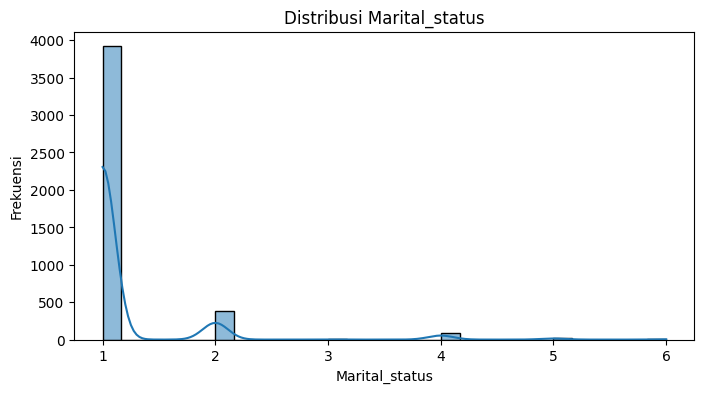

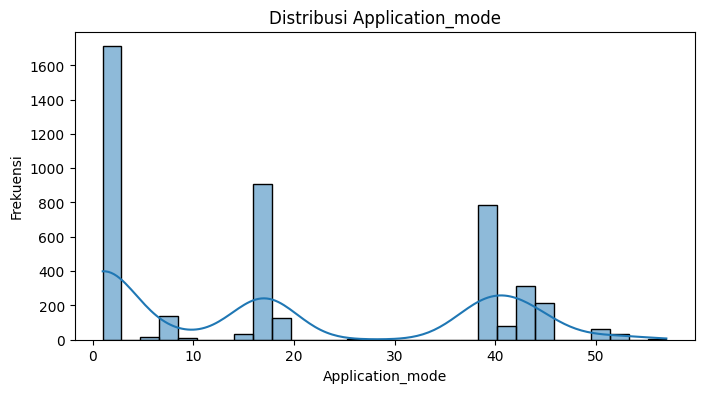

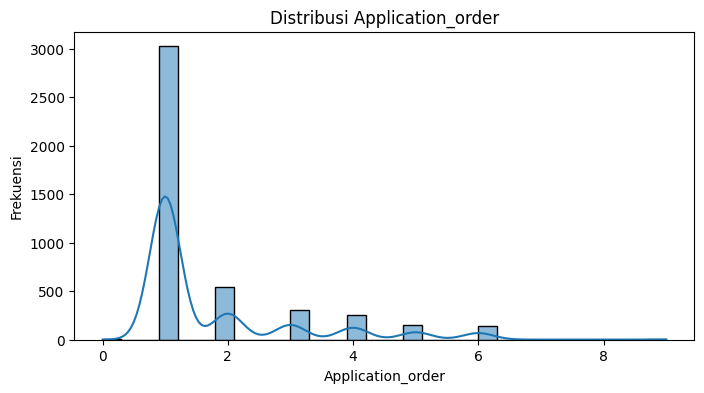

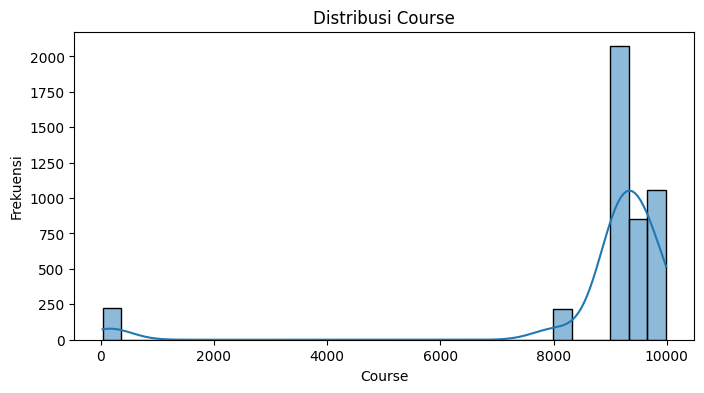

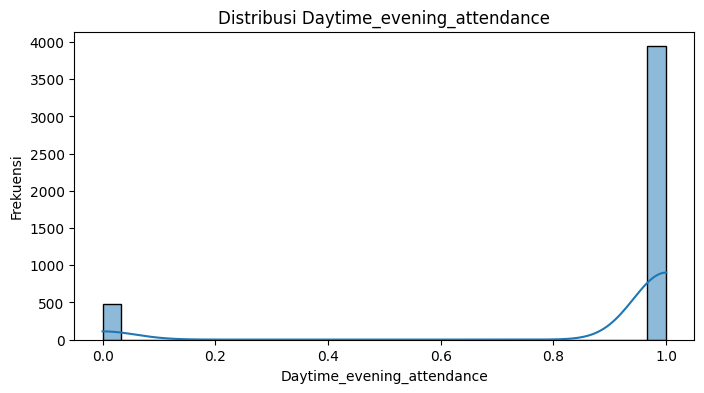

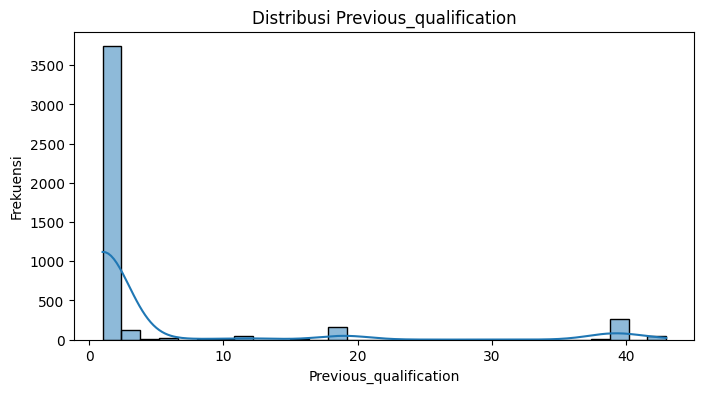

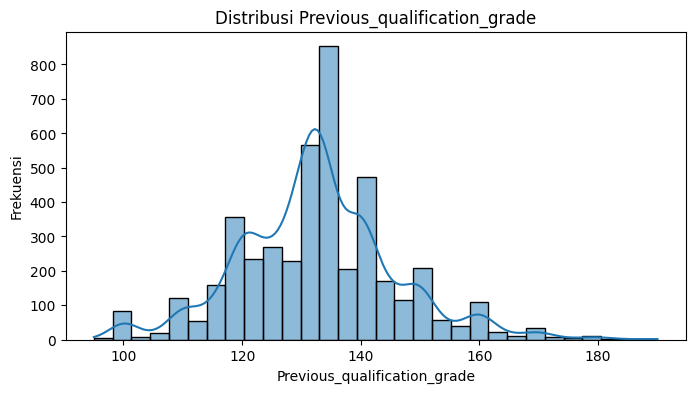

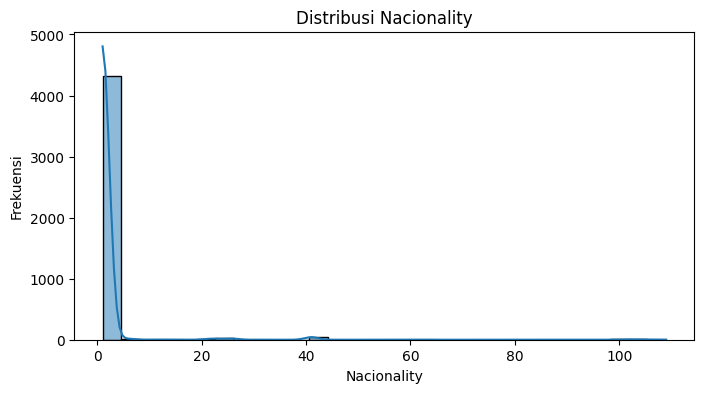

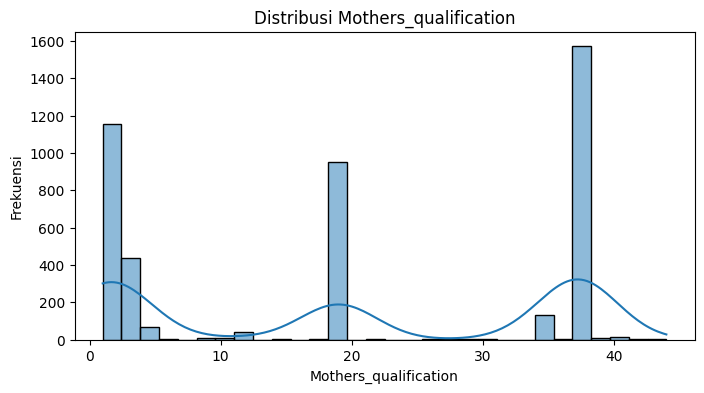

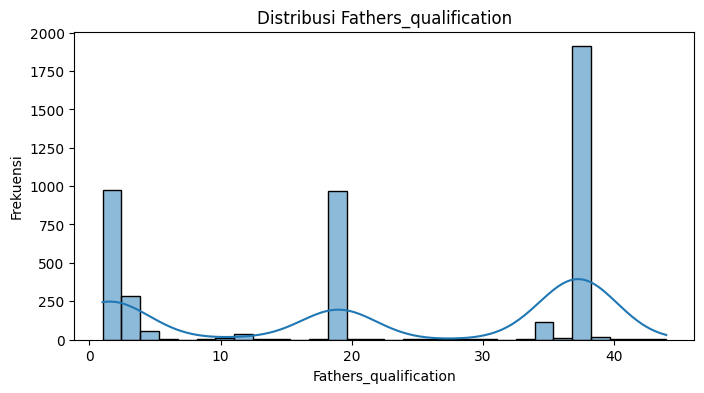

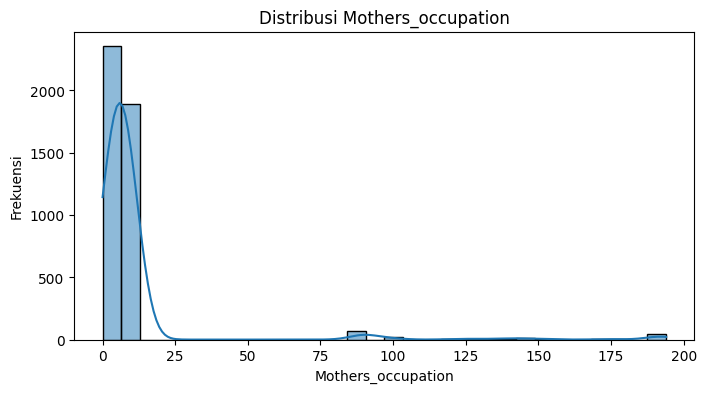

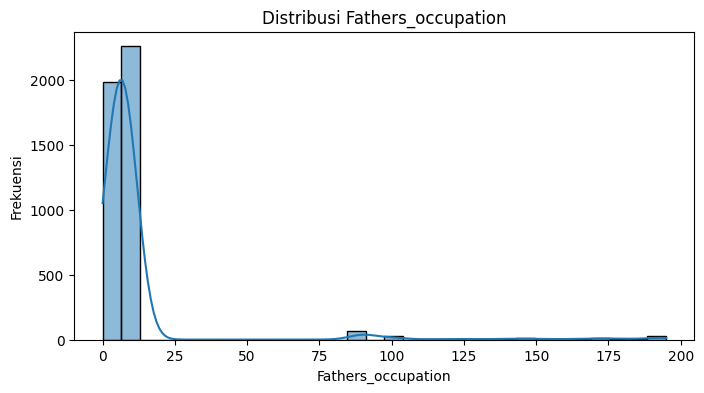

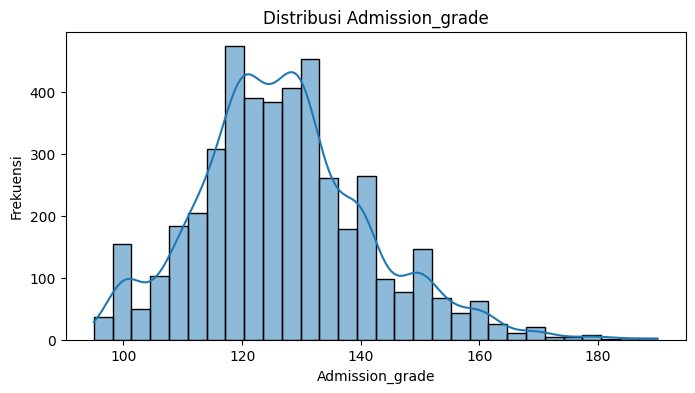

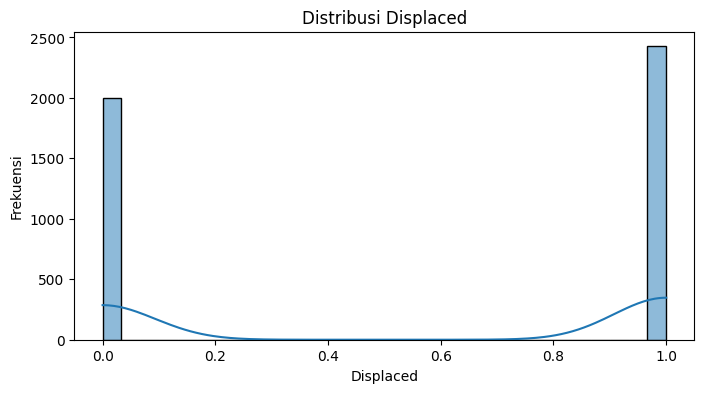

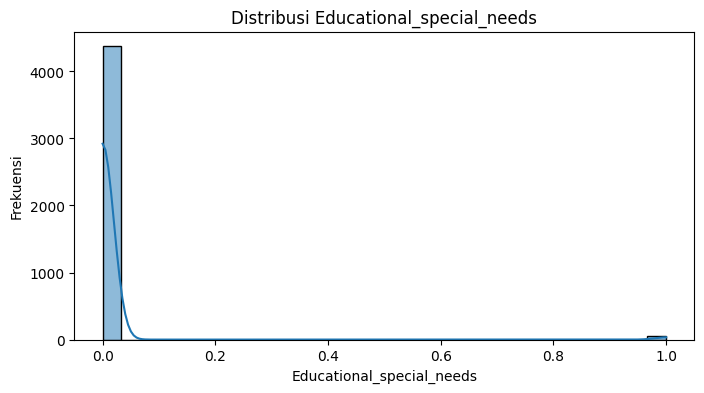

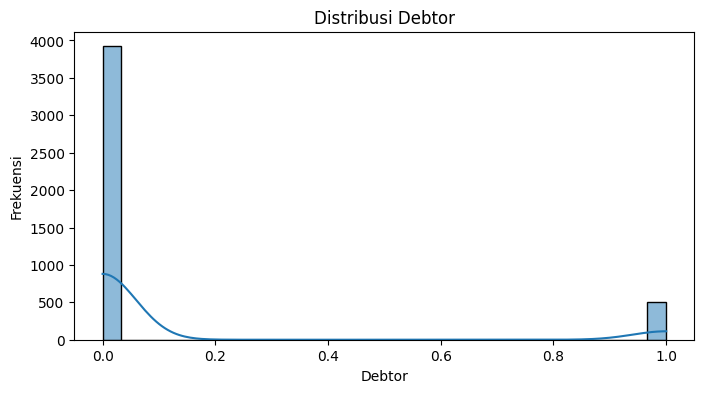

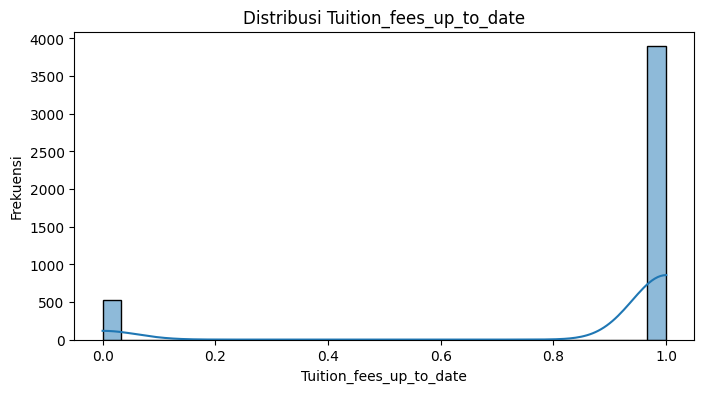

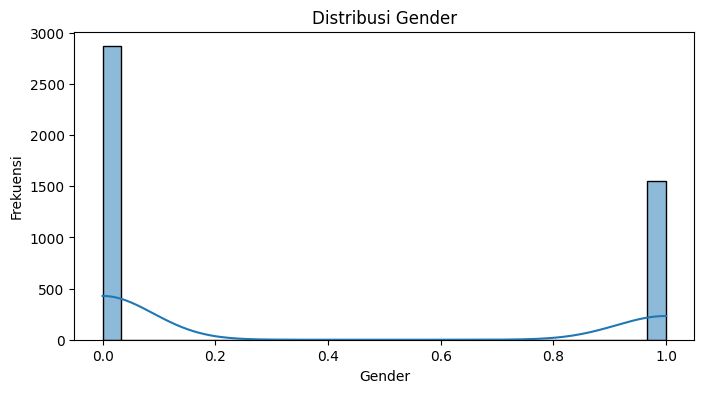

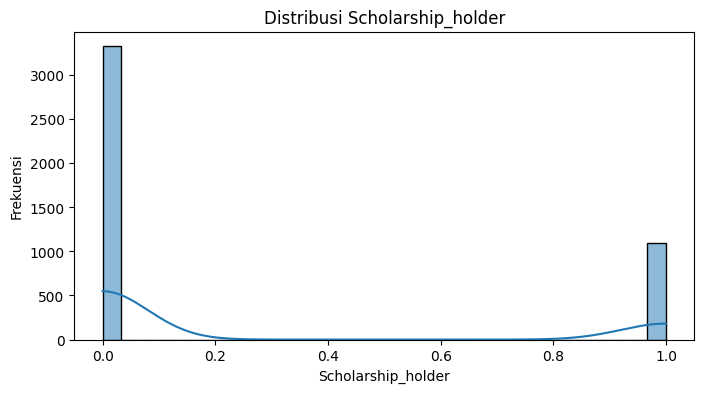

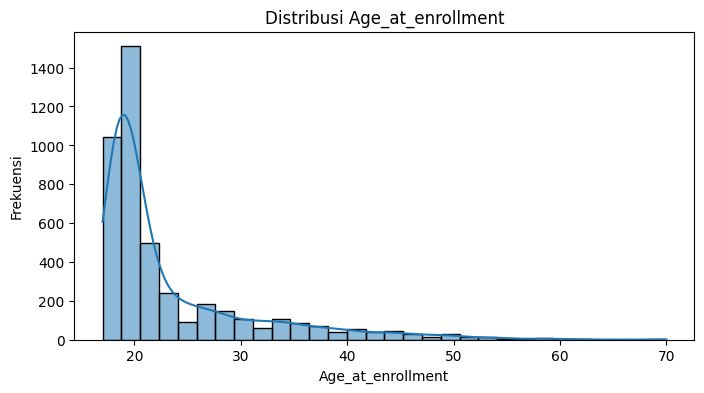

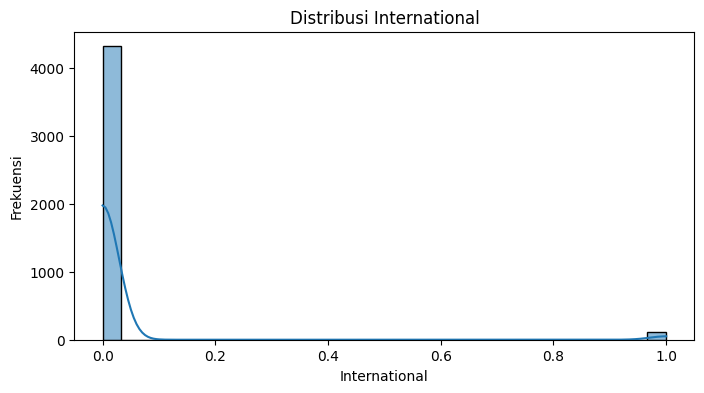

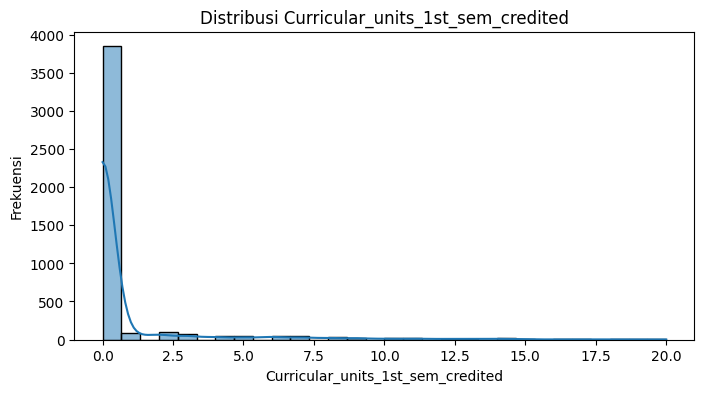

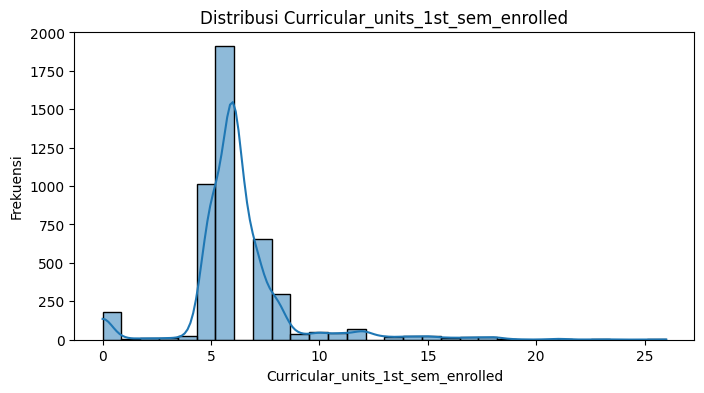

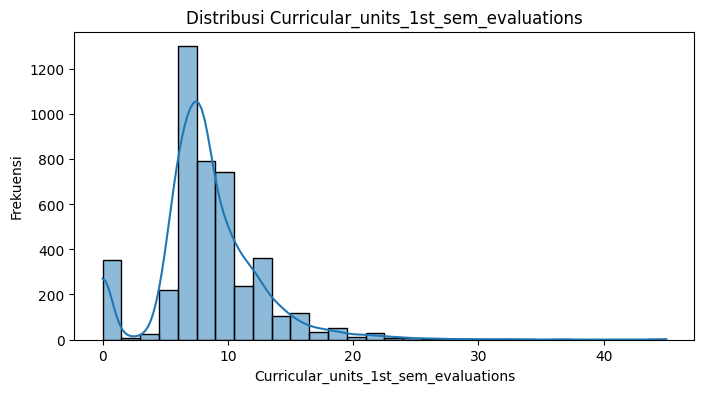

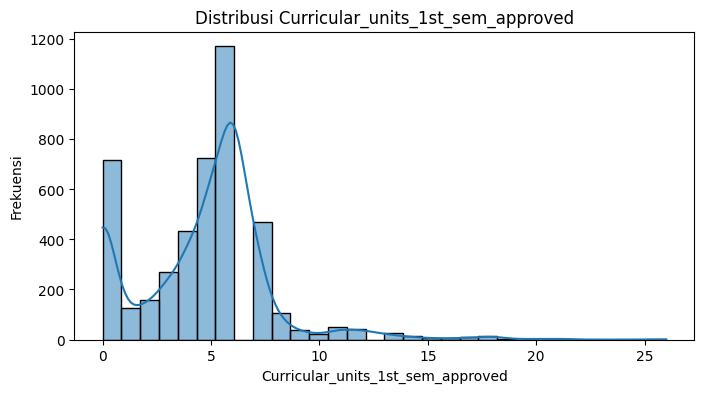

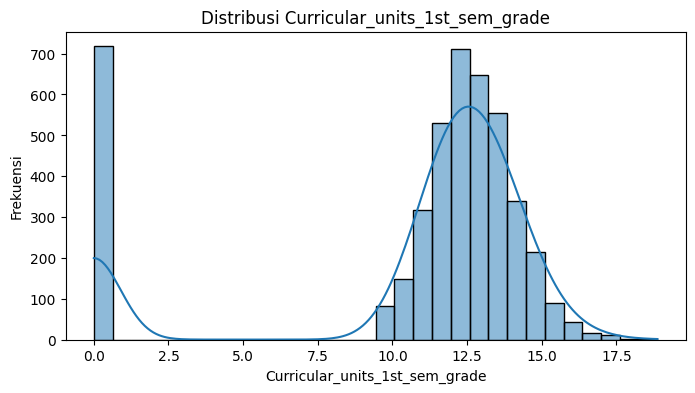

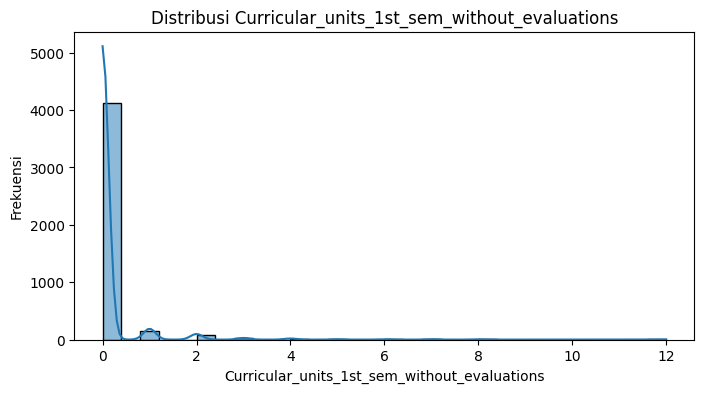

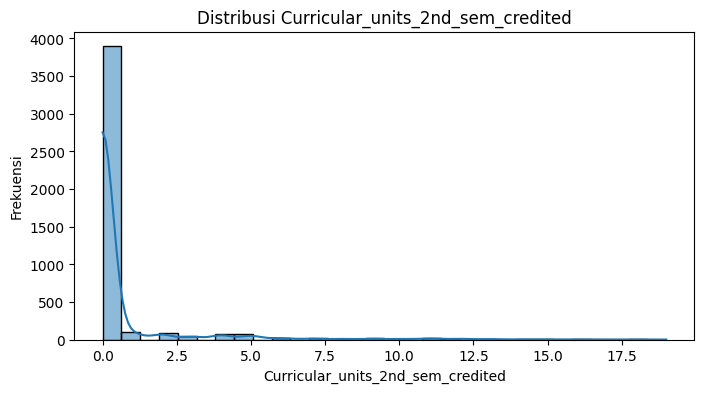

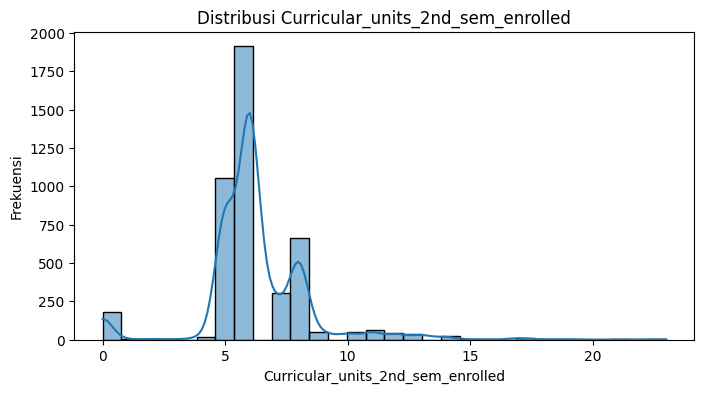

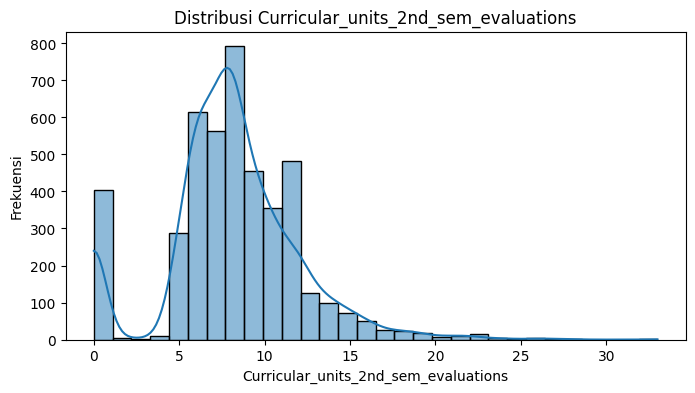

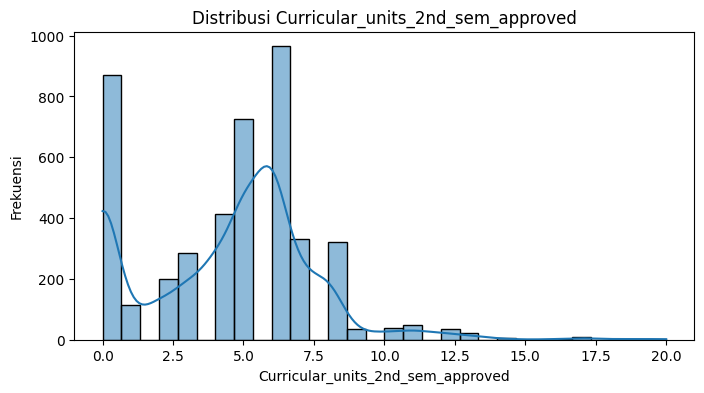

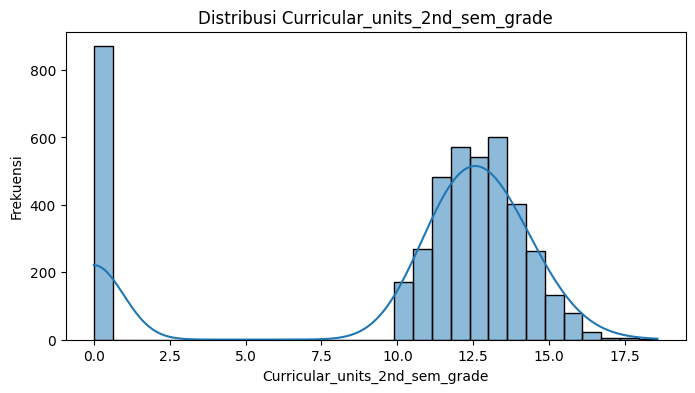

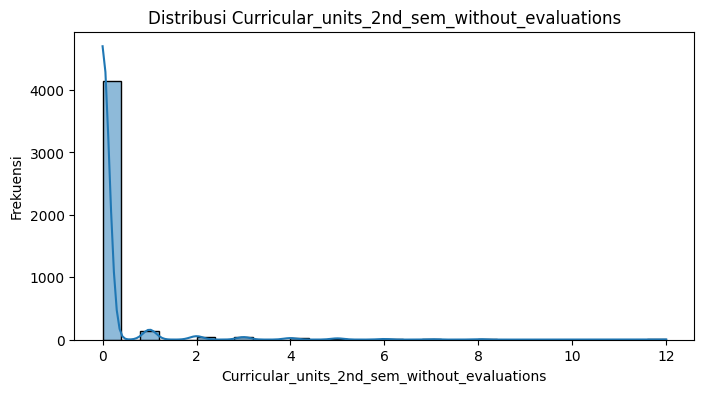

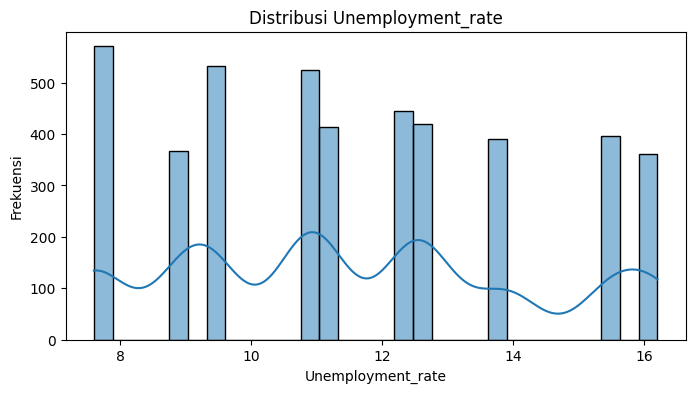

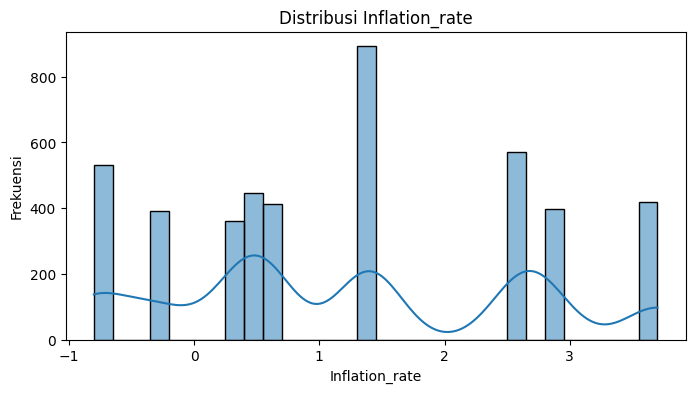

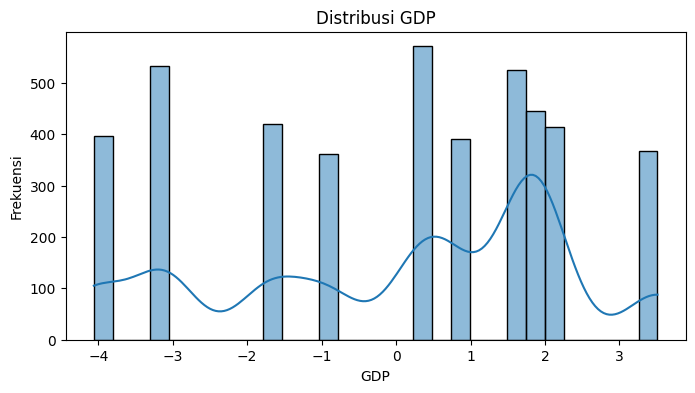

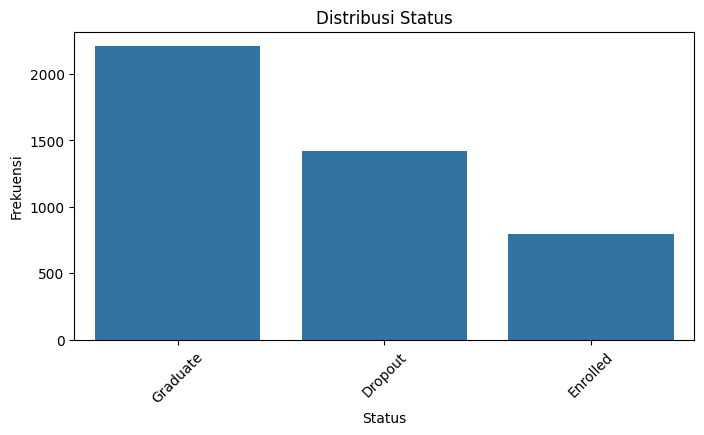

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi fitur numerikal
numerical_features = cc_apps.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(cc_apps[feature], kde=True, bins=30)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.show()

# Distribusi fitur kategorikal
categorical_features = cc_apps.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=cc_apps, x=feature, order=cc_apps[feature].value_counts().index)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.show()

*  EDA Multivariate

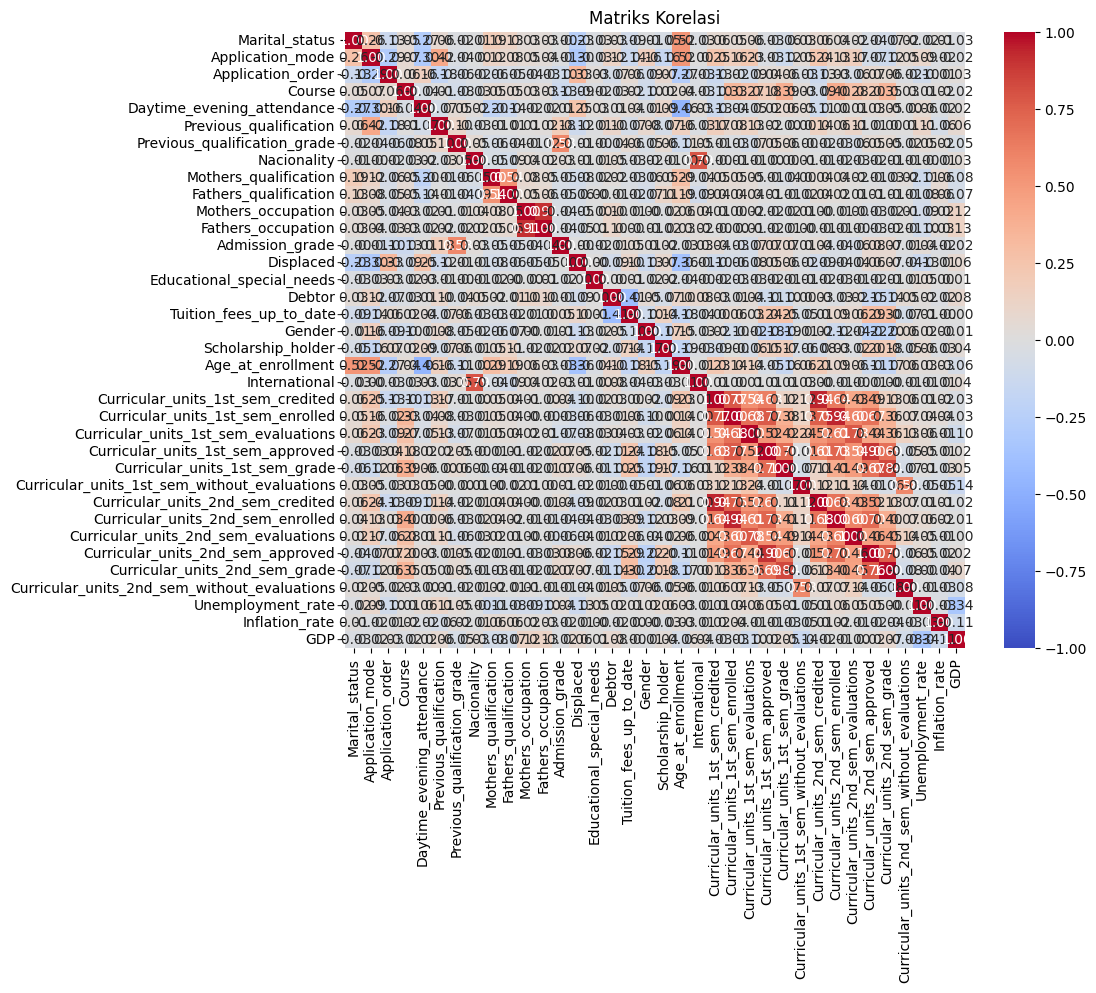

The column 'Status_encoded' has been created.


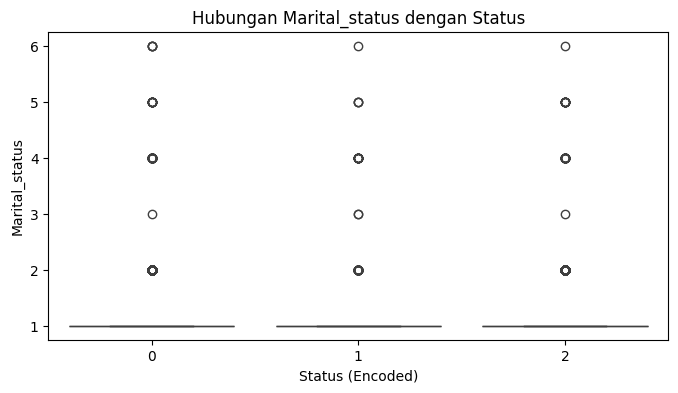

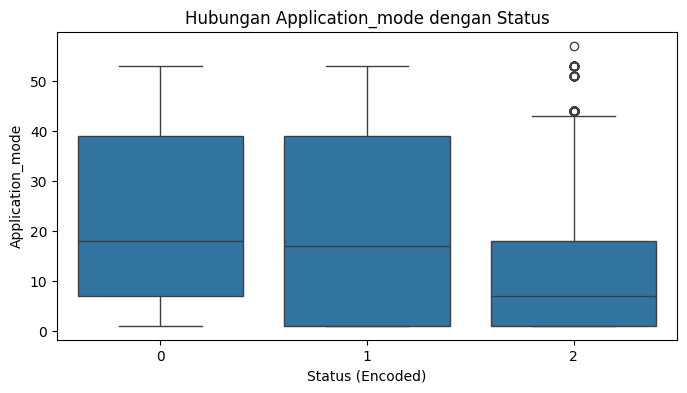

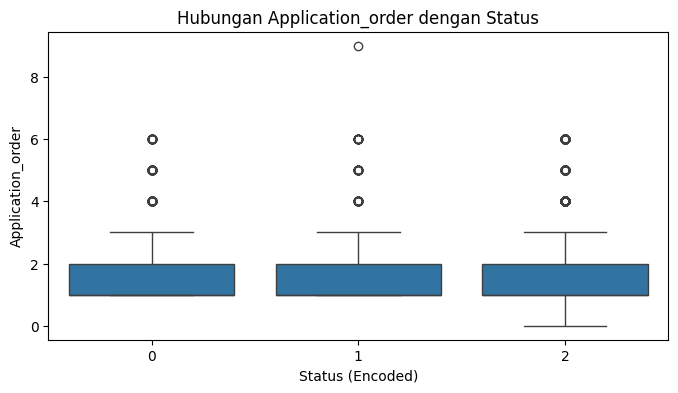

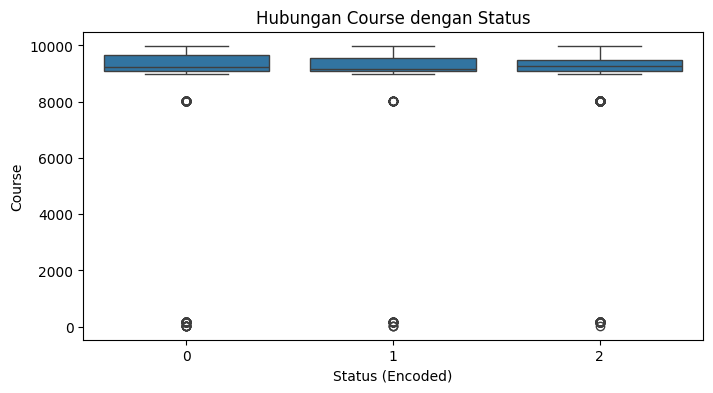

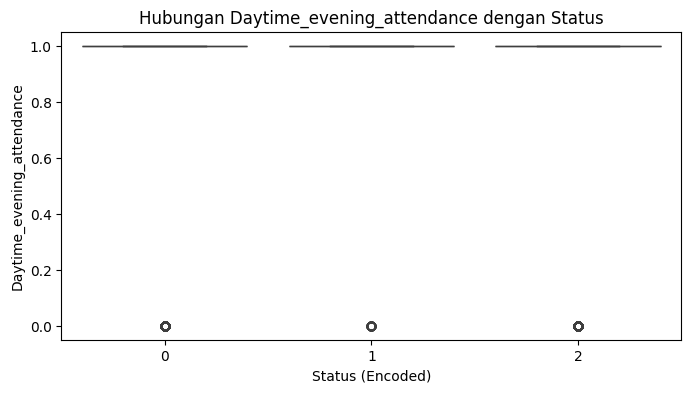

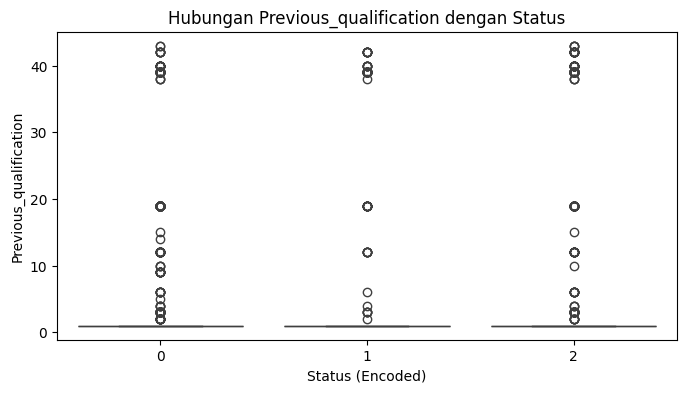

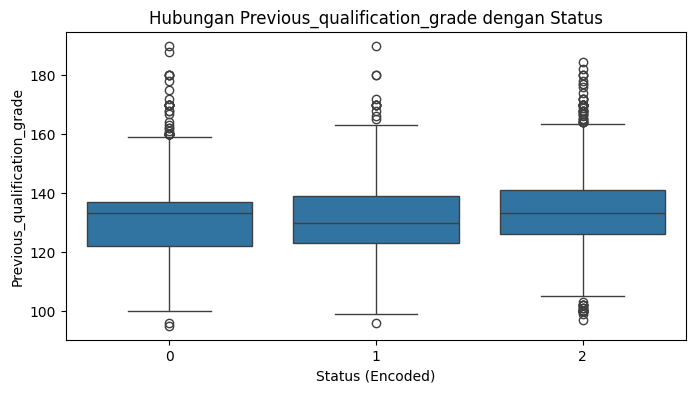

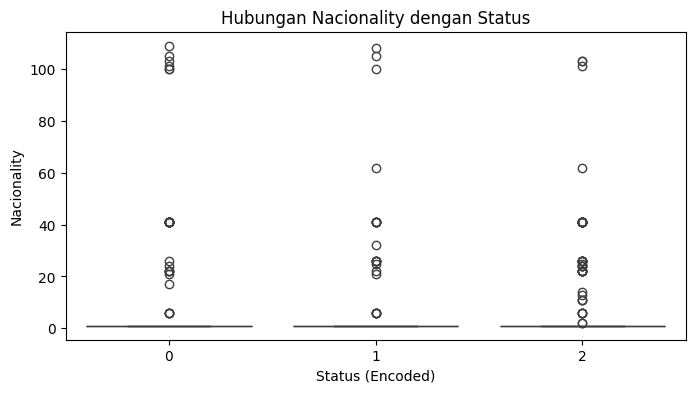

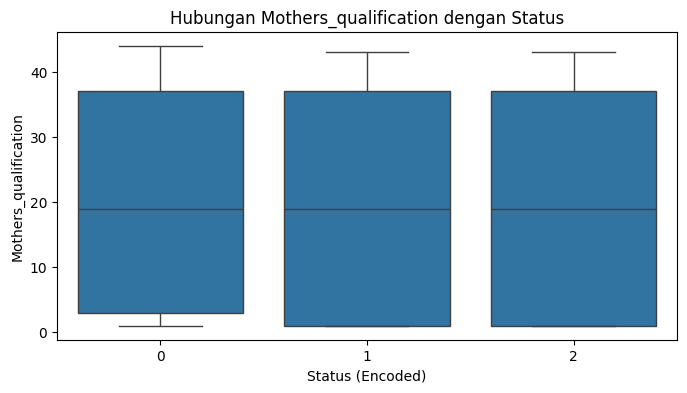

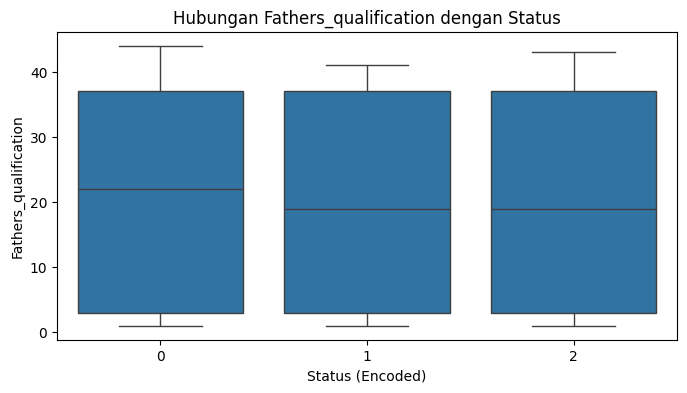

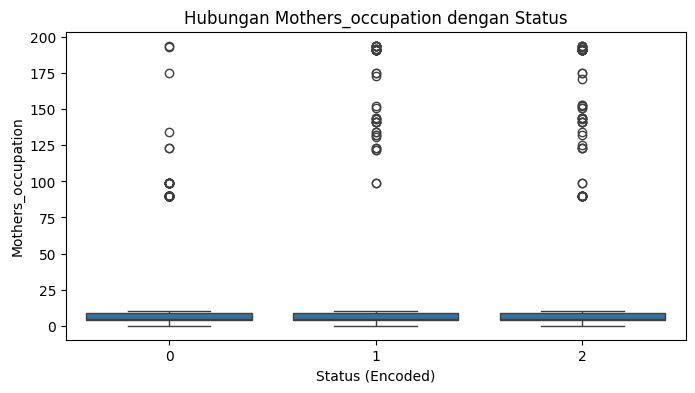

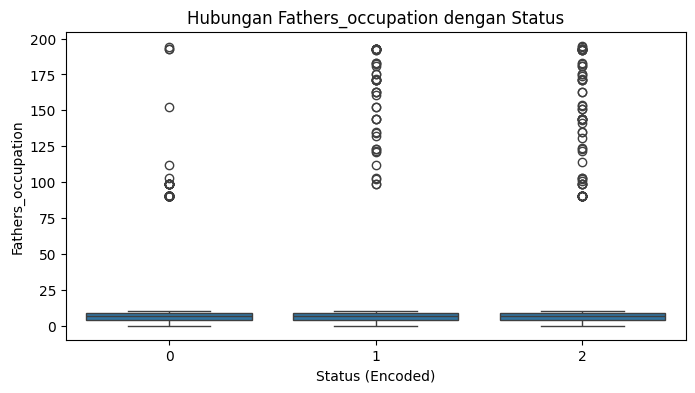

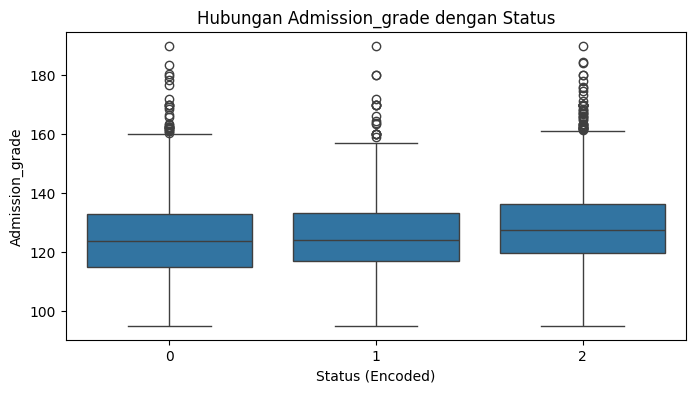

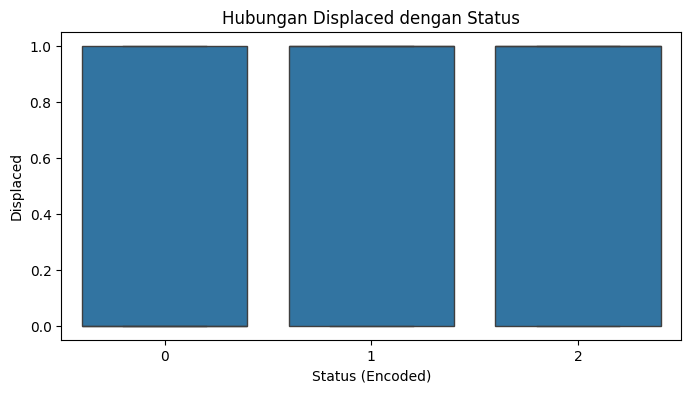

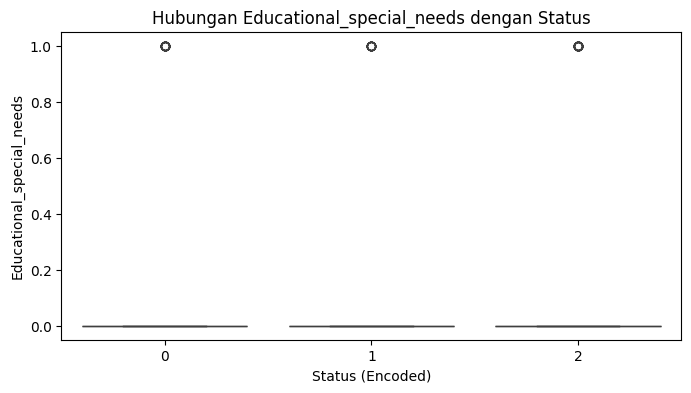

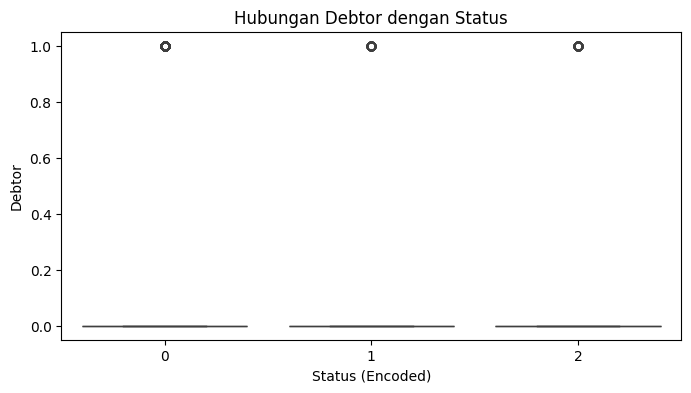

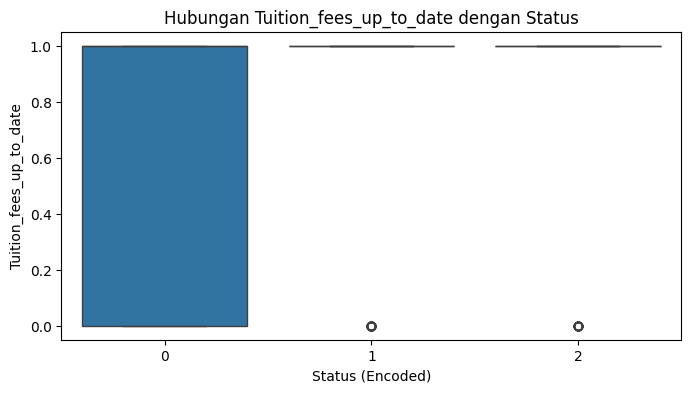

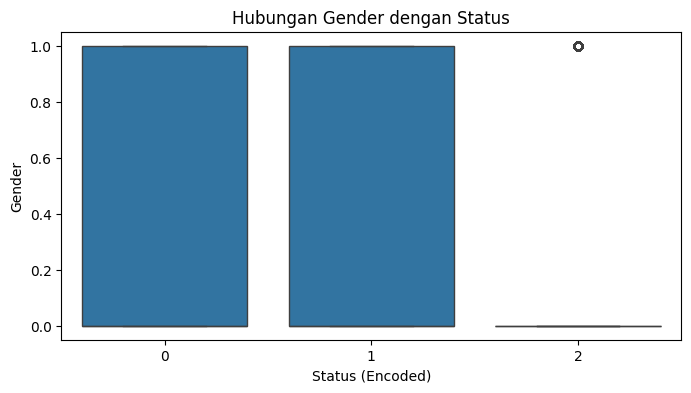

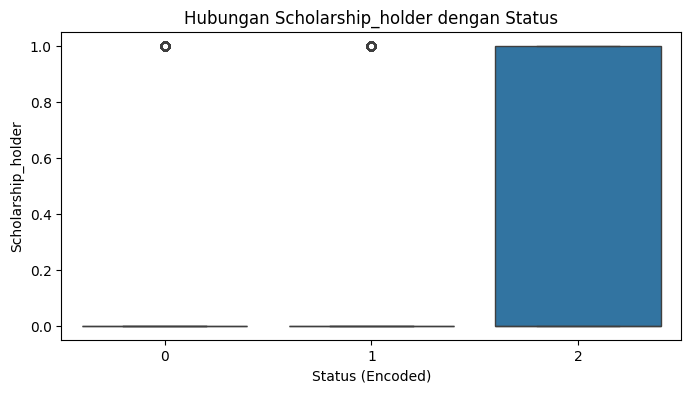

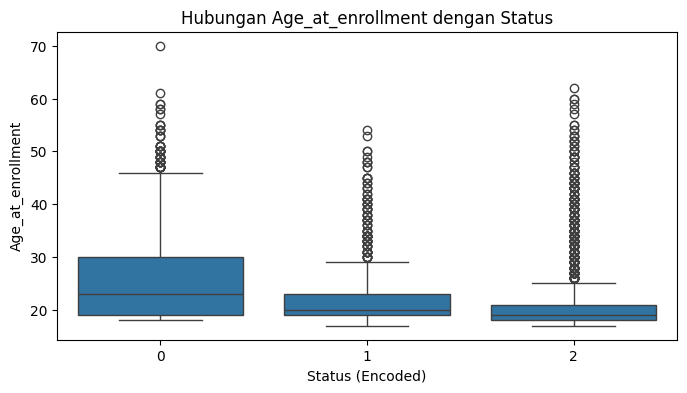

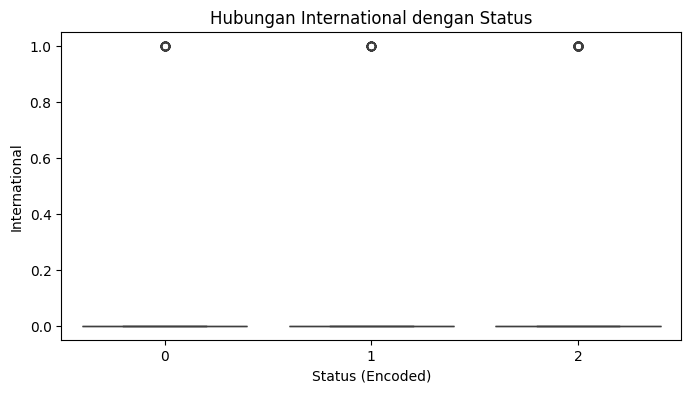

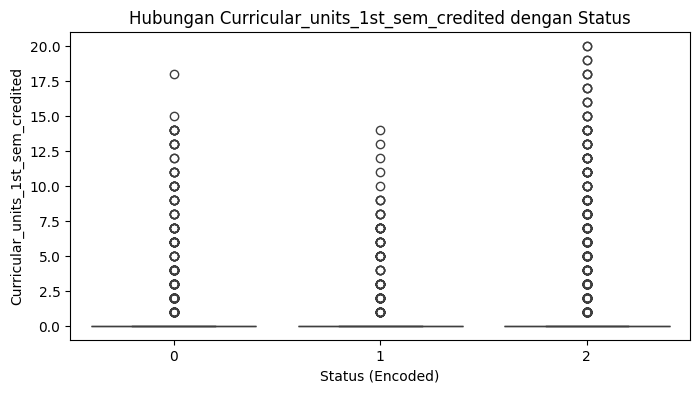

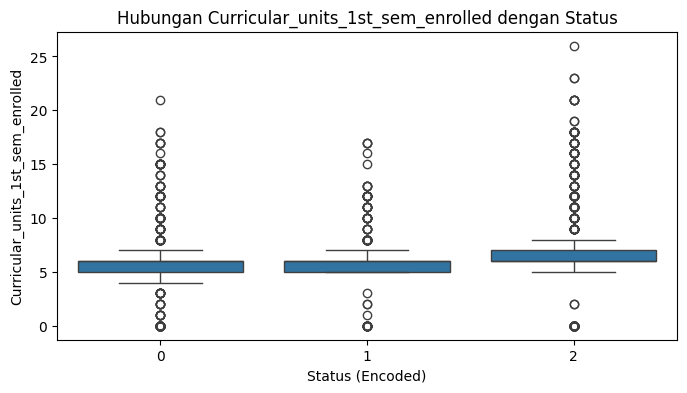

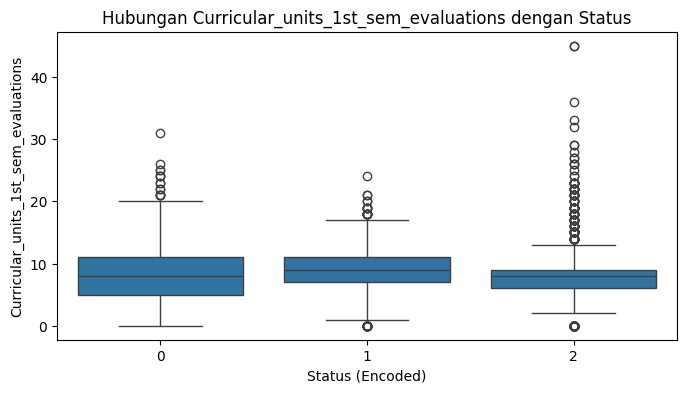

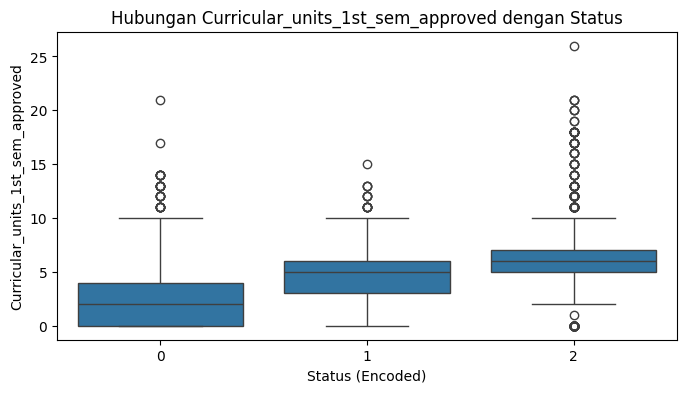

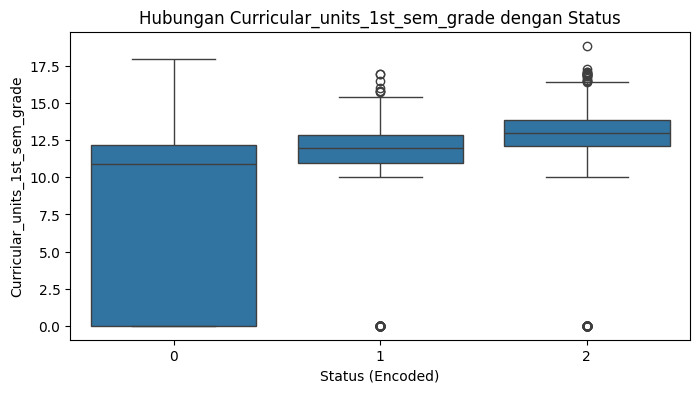

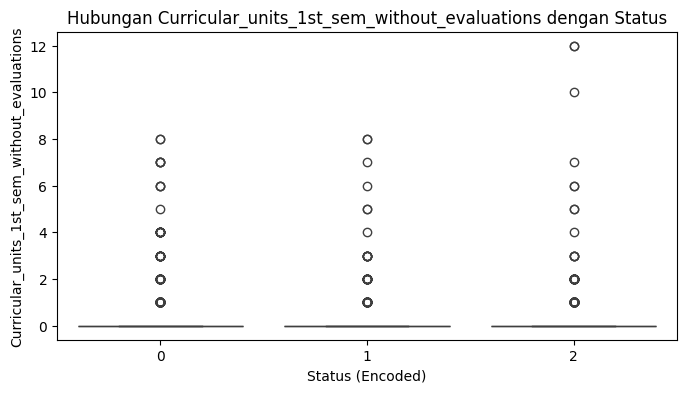

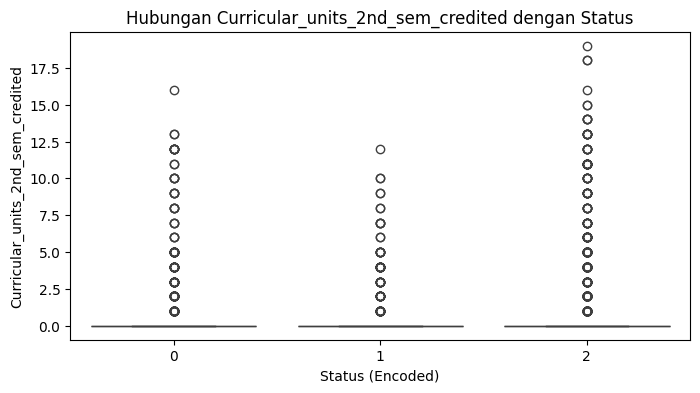

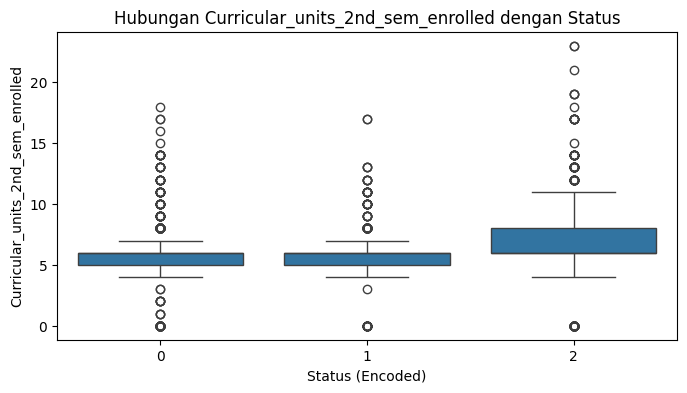

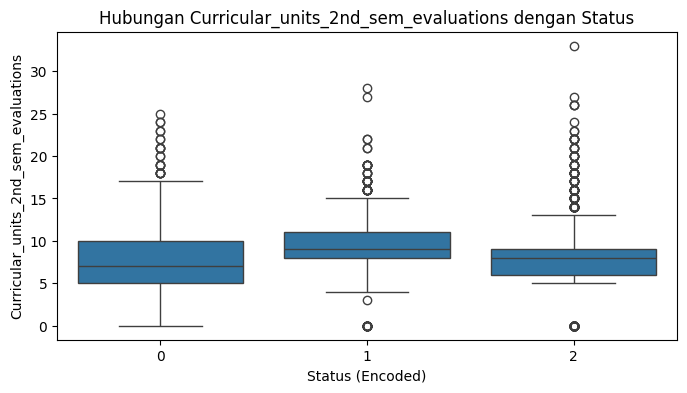

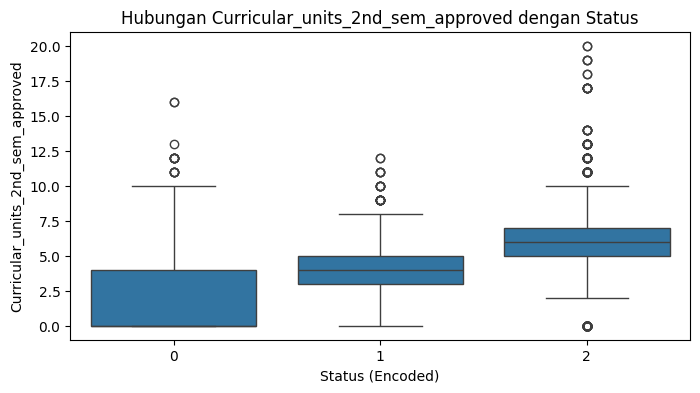

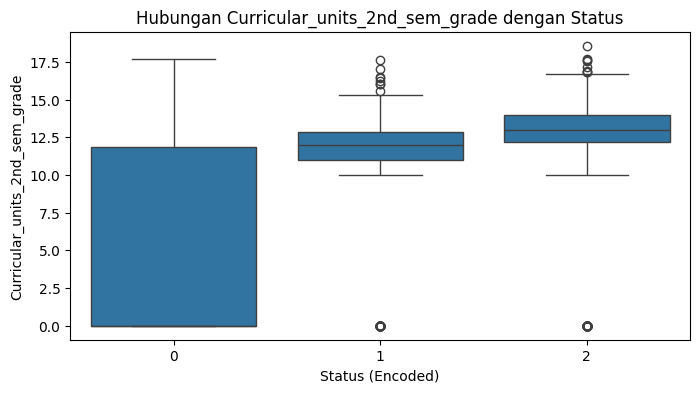

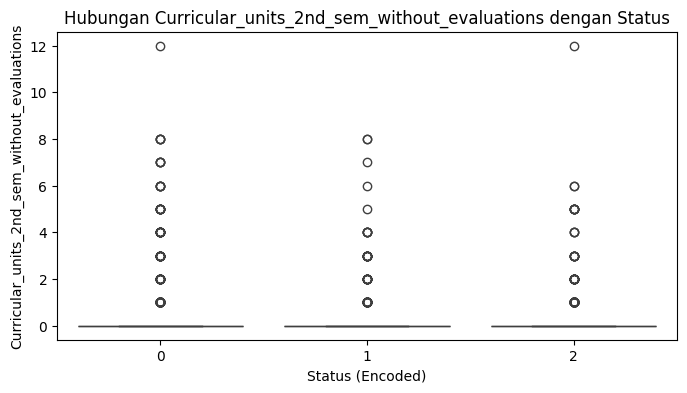

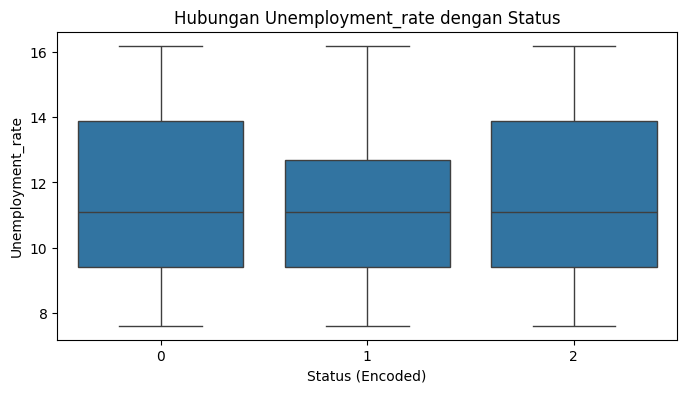

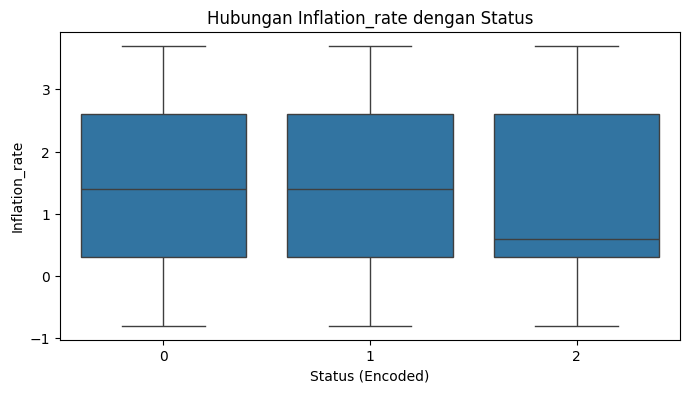

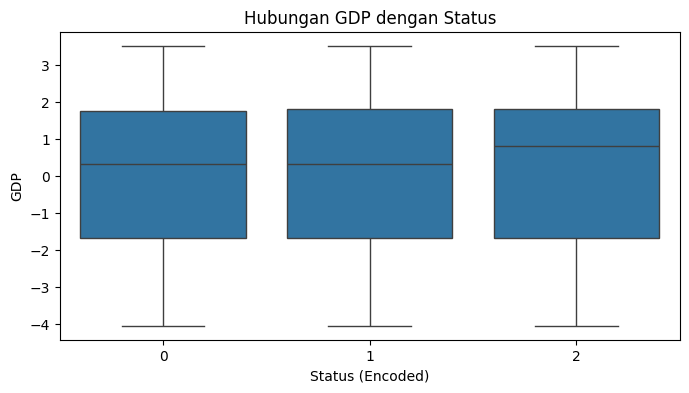

In [31]:
# Korelasi antar fitur numerikal
plt.figure(figsize=(10, 8))
correlation_matrix = cc_apps.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Matriks Korelasi')
plt.show()

# Ensure 'Status_encoded' exists in the DataFrame
if 'Status_encoded' not in cc_apps.columns:
    # Create 'Status_encoded' column if it does not exist
    le = LabelEncoder()
    cc_apps['Status_encoded'] = le.fit_transform(cc_apps['Status'])
    print("The column 'Status_encoded' has been created.")

# Hubungan antara fitur numerikal dan target
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=cc_apps, x='Status_encoded', y=feature)
    plt.title(f'Hubungan {feature} dengan Status')
    plt.xlabel('Status (Encoded)')
    plt.ylabel(feature)
    plt.show()

* EDA Numerikal

In [32]:
# Statistik deskriptif untuk fitur numerikal
print("Statistik Deskriptif Fitur Numerikal:")
print(cc_apps[numerical_features].describe())

Statistik Deskriptif Fitur Numerikal:
       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000         

* EDA kategorikal

C:\Users\hrahm\AppData\Local\Temp\ipykernel_5392\2636436836.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Status')


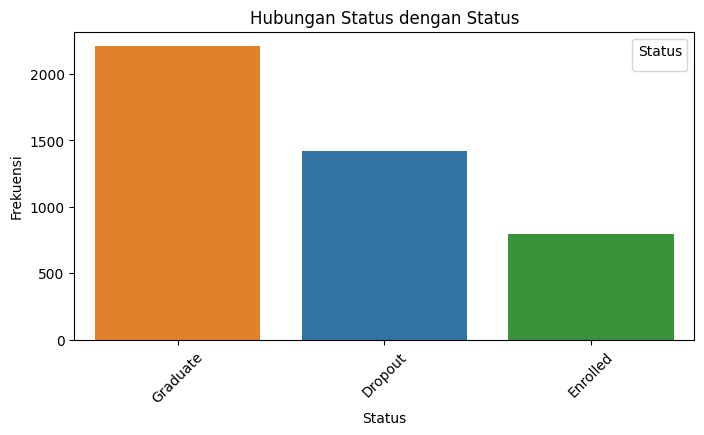

In [33]:
# Hubungan antara fitur kategorikal dan target
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=cc_apps, x=feature, hue='Status', order=cc_apps[feature].value_counts().index)
    plt.title(f'Hubungan {feature} dengan Status')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.legend(title='Status')
    plt.show()

## Data Preparation

In [34]:
# Contoh encode kolom 'Status' menjadi angka
le = LabelEncoder()
cc_apps['Status_encoded'] = le.fit_transform(cc_apps['Status'])
# Mapping: lihat urutan label
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


In [35]:
cc_apps.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Drop kolom target dari fitur
X = cc_apps.drop(columns=['Status', 'Status_encoded'])
y = cc_apps['Status_encoded']

# Encode fitur kategorikal
X_encoded = pd.get_dummies(X)

print(f"Shape setelah encode: {X_encoded.shape}")


Shape setelah encode: (4424, 36)


In [37]:
# Train model cepat
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_encoded, y)

# Ambil feature importances
feature_importances = pd.Series(model_rf.feature_importances_, index=X_encoded.columns)

# Urutkan dari yang paling penting
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Ambil Top 6 fitur
top6_features = feature_importances_sorted.head(6)
print(top6_features)


Curricular_units_2nd_sem_approved    0.139741
Curricular_units_2nd_sem_grade       0.112829
Curricular_units_1st_sem_approved    0.090682
Curricular_units_1st_sem_grade       0.060050
Admission_grade                      0.043596
Tuition_fees_up_to_date              0.040820
dtype: float64


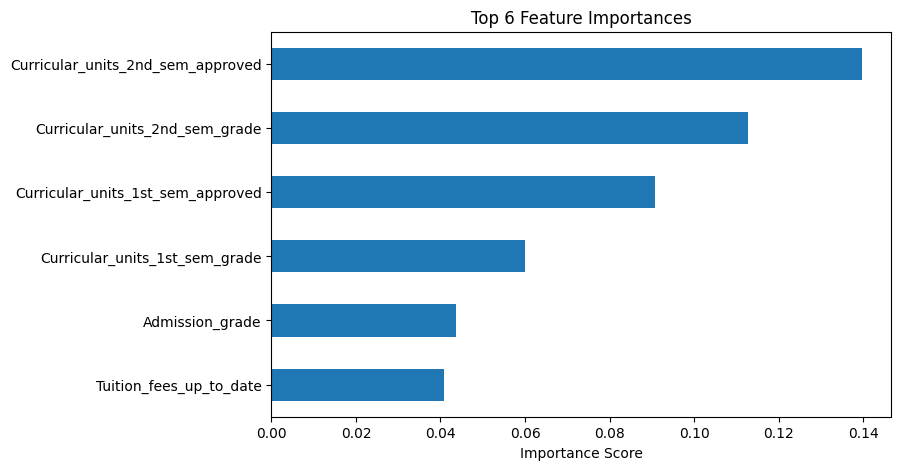

In [38]:
plt.figure(figsize=(8,5))
top6_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 6 Feature Importances')
plt.xlabel('Importance Score')
plt.show()


In [39]:
from sklearn.model_selection import train_test_split

# Split data menjadi data pelatihan dan data uji (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan bentuk data untuk memastikan
print(f"Shape X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape X_train: (3539, 36), y_train: (3539,)
Shape X_test: (885, 36), y_test: (885,)


# Modeling

In [40]:
from sklearn.metrics import classification_report

# Training model
model_rf_final = RandomForestClassifier(random_state=42)
model_rf_final.fit(X_train, y_train)

# Prediksi
y_pred = model_rf_final.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.8123    0.7465    0.7780       284
           1     0.5673    0.3711    0.4487       159
           2     0.7846    0.9231    0.8482       442

    accuracy                         0.7672       885
   macro avg     0.7214    0.6802    0.6916       885
weighted avg     0.7544    0.7672    0.7539       885



# Evaluation

In [41]:
import pandas as pd
import numpy as np

# Contoh input data dalam bentuk DataFrame
input_data_raw = pd.DataFrame({
    'Curricular_units_2nd_sem_grade': [5.0],
    'Curricular_units_2nd_sem_approved': [1],
    'Curricular_units_1st_sem_grade': [4.0],
    'Tuition_fees_up_to_date': [0],
    'Curricular_units_1st_sem_approved': [1],
    'Age_at_enrollment': [18]
})

# Encode data input menggunakan pd.get_dummies
input_data_encoded = pd.get_dummies(input_data_raw)

# Pastikan kolom input sama dengan kolom dataset pelatihan
input_data_encoded = input_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Periksa apakah jumlah kolom sesuai
if input_data_encoded.shape[1] != X_encoded.shape[1]:
    raise ValueError(f"Input data has {input_data_encoded.shape[1]} features, but the model expects {X_encoded.shape[1]} features.")

# Konversi ke NumPy array
input_data = input_data_encoded.to_numpy()

# Lakukan prediksi
prediction = model_rf_final.predict(input_data)

# Mapping hasil prediksi ke label asli
status_mapping = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}  # Sesuaikan dengan encoding
predicted_label = status_mapping[prediction[0]]

# Tampilkan hasil prediksi
print(f"Hasil Prediksi: {predicted_label}")

Hasil Prediksi: Dropout


c:\Users\hrahm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
import os
import joblib

# Pastikan folder 'model' ada, jika belum maka buat
os.makedirs("model", exist_ok=True)

# Simpan model yang sudah dilatih ke dalam folder 'model'
model_filename = "model/student_status_model.pkl"
joblib.dump(model_rf_final, model_filename)

print(f"Model disimpan sebagai {model_filename}")


Model disimpan sebagai model/student_status_model.pkl


In [43]:
# !pipreqs .